In [23]:
from SVM_SMO import SVM 
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.rcParams['figure.figsize'] = [10, 10]

In [96]:
# Reading data
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)][(np.where((iris["target"] == 1) | (iris["target"] == 2)))]
y = (iris["target"][(np.where((iris["target"] == 1) | (iris["target"] == 2)))] == 2).astype(np.float64)
y[y == 0] = -1

# Creating meshplot
h = .03
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
input_df = np.c_[xx.ravel(), yy.ravel()]

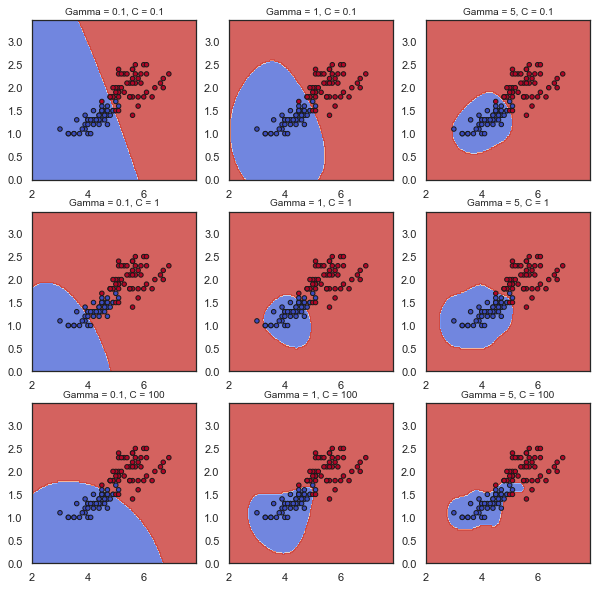

In [110]:
# Fitting SVM's and getting predictions for different hyperparameter values 
fig, ax_list = plt.subplots(3, 3)
np.random.seed(123)
for C_i, gamma_i, ax in zip([.1, .1, .1, 1, 1, 1, 100, 100, 100], [.1, 1, 5, .1, 1, 5, .1, 1, 5], ax_list.flatten()):
    
    # Storing SVM object
    svm_mod = SVM(C = C_i, gamma = gamma_i, max_iter = 100, kernel = "rbf")

    # Fitting SVM model
    svm_mod.fit(X, y)
    
    # Getting model predictions and visualizing decision boundary
    predictions = svm_mod.predict(input_df)
    Z = predictions.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title("Gamma = " + str(gamma_i) + ", C = " + str(C_i), fontsize=10)
  